[Data Source](https://www.kaggle.com/srikaranelakurthy/bank-marketing-analysis)

Hi,欢迎来到实战营的最后一个项目——Machine Learning实战，在这部分，我们将通过对某银行的真实数据进行清洗、分析、可视化、建模等操作，预测某客户是否会订购定期存款业务。

如下便是该数据集的数据字典，是时候展现真正的技术啦！Come On！

|NO   | 字段名称|  数据类型 |字段描述
-------|---------|-----------|----------
1 |ID |Int |客户唯一标识
2 |age |Int |客户年龄
3 |job |String |客户的职业
4 |marital |String |婚姻状况
5 |education |String |受教育水平
6 |default |String |是否有违约记录
7 |balance |Int |每年账户的平均余额
8 |housing |String |是否有住房贷款
9 |loan |String |是否有个人贷款
10 |contact |String |与客户联系的沟通方式
11 |day |Int |最后一次联系的时间（几号）
12 |month |String |最后一次联系的时间（月份）
13 |duration |Int |最后一次联系的交流时长
14 |campaign |Int |在本次活动中，与该客户交流过的次数
15 |pdays |Int |距离上次活动最后一次联系该客户，过去了多久（999表示没有联系过）
16 |previous |Int |在本次活动之前，与该客户交流过的次数
17 |poutcome |String |上一次活动的结果
18 |y |Int |预测客户是否会订购定期存款业务

In [1]:
# 导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#设置中文字体
plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
data = pd.read_csv('data/buyornot_train_set.csv')

## 数据分析

### 查看数据概览

In [8]:
# 查看前5行
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [4]:
# 查看基本信息，检查是否有数据类型错误，是否有缺失情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 18 columns):
ID           25317 non-null int64
age          25317 non-null int64
job          25317 non-null object
marital      25317 non-null object
education    25317 non-null object
default      25317 non-null object
balance      25317 non-null int64
housing      25317 non-null object
loan         25317 non-null object
contact      25317 non-null object
day          25317 non-null int64
month        25317 non-null object
duration     25317 non-null int64
campaign     25317 non-null int64
pdays        25317 non-null int64
previous     25317 non-null int64
poutcome     25317 non-null object
y            25317 non-null int64
dtypes: int64(9), object(9)
memory usage: 3.5+ MB


In [5]:
# 查看数据的重复情况
sum(data.duplicated(subset=['ID']))

0

In [6]:
# 查看数值型数据基本统计情况
data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,y
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,1357.555082,15.835289,257.732393,2.772050,40.248766,0.591737,0.116957
std,7308.532719,10.634289,2999.822811,8.319480,256.975151,3.136097,100.213541,2.568313,0.321375
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6330.000000,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,12659.000000,39.000000,448.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,0.000000
75%,18988.000000,48.000000,1435.000000,21.000000,317.000000,3.000000,-1.000000,0.000000,0.000000
max,25317.000000,95.000000,102127.000000,31.000000,3881.000000,55.000000,854.000000,275.000000,1.000000


In [7]:
# 筛选出类别变量
cate_cols = data.select_dtypes(include=['O']).columns
# 查看类别型数据基本统计情况
for col in cate_cols:
    print(col)
    print(data[col].value_counts())
    print('\n')

job
blue-collar      5456
management       5296
technician       4241
admin.           2909
services         2342
retired          1273
self-employed     884
entrepreneur      856
unemployed        701
housemaid         663
student           533
unknown           163
Name: job, dtype: int64


marital
married     15245
single       7157
divorced     2915
Name: marital, dtype: int64


education
secondary    12957
tertiary      7447
primary       3848
unknown       1065
Name: education, dtype: int64


default
no     24869
yes      448
Name: default, dtype: int64


housing
yes    14020
no     11297
Name: housing, dtype: int64


loan
no     21258
yes     4059
Name: loan, dtype: int64


contact
cellular     16391
unknown       7281
telephone     1645
Name: contact, dtype: int64


month
may    7655
jul    3937
aug    3482
jun    2968
nov    2243
apr    1669
feb    1464
jan     777
oct     411
sep     339
mar     269
dec     103
Name: month, dtype: int64


poutcome
unknown    20677
failure    

总结：
- `ID`为用户唯一识别标识，不应作为分析项，所以需要删除或者将其作为索引`index`；
- `day`表示最后一次联系的时间（几号），应该为分类变量；
- `balance`中数据离散程度较高；
- `pdays`中出现负数（`-1`）。

### 探索性分析

- 关键列：`y`

In [8]:
data['y'].value_counts(1)

0    0.883043
1    0.116957
Name: y, dtype: float64

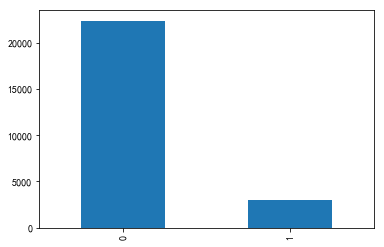

In [9]:
data['y'].value_counts().plot(kind='bar');

关键列表示客户是否会订购定期存款业务，其中`1`（订购）的占比约为11.7%，远低于未订购客户。

- `ID`

In [31]:
# 将ID删除
# data = data.drop('ID',axis=1)
# 将ID转换为索引
data = data.set_index('ID')

- age

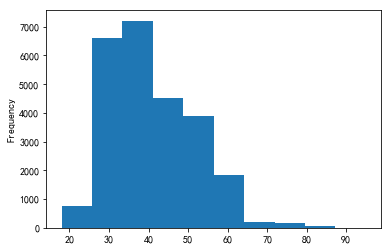

In [11]:
# 绘制直方图
data['age'].plot(kind='hist');

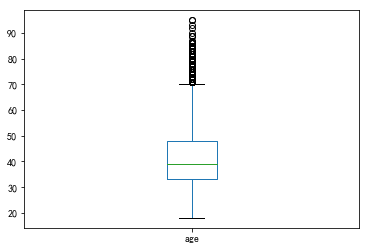

In [12]:
# 绘制箱线图
data['age'].plot(kind='box');

年龄主要分布在25-65之间，有少量的离群值。

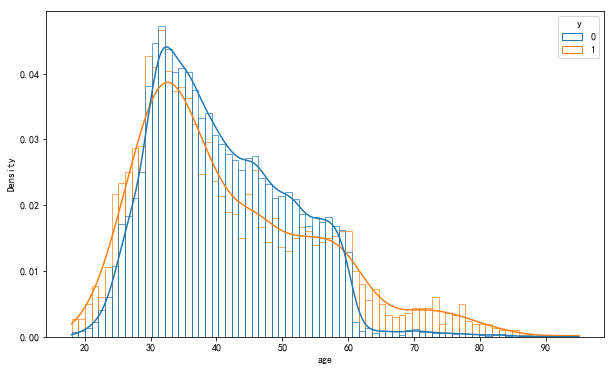

In [13]:
# age与y之间的关系
# 设置图像大小
plt.figure(figsize=(10,6))
# 设置可视化
sns.histplot(x='age',hue='y',data=data,kde=True,stat="density", common_norm=False,fill=False);

上图所示为按照类别归一化后的分布图，我们可以发现，对于参与活动的客户来说，分布在30岁以下及60岁以上的概率要比未参与活动的客户高。

**解析：**
- 由于两种类别的客户数量上相差较多，所以，我们需要从不同年龄的占比上去分析对比会更合适，否则的话，参与活动的客户在各个年龄层肯定都是远小于未参与活动客户的；
- 使用`seaborn`中的`histplot`函数绘制直方图，并设置参数：
    - `kde=True`： 显示核密度估计曲线
    - `stat="density"`： 设置统计方式为 密度，也就是直方图的面积为1
    - `common_norm=False`： 设置按照类别进行归一化
    - `fill=False`： 去除直方图中柱子的颜色填充

**参考：**
- [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)
    

In [14]:
# 因为还有其他数值型变量，所以，为了避免重复写代码，我们可以使用函数的形式对如上分析进行封装
def numerical_eda(col_name):
    '''
    对数值型变量进行探索性分析，返回该变量的分布直方图、箱线图及其与关键列y之间的关系
    col_name: str, 待分析的列名
    '''
    # 设置图像大小
    plt.figure(figsize=(10,10))
    # 添加子图1，hist
    ax1 = plt.subplot(221)
    data[col_name].plot(kind='hist',title=f'{col_name}分布直方图',ax=ax1)
    # 添加子图2，box
    ax2 = plt.subplot(222)
    data[col_name].plot(kind='box',title=f'{col_name}分布箱线图',ax=ax2)
    # 添加子图3，关系hist
    ax3 = plt.subplot(212)
    sns.histplot(x=col_name,hue='y',data=data,kde=True,
                 stat="density", common_norm=False,fill=False,ax=ax3)
    ax3.set_title('与关键列关系')
    plt.suptitle(f'{col_name}分析');

**解析：**
- 使用`plt.subplot`设置子图，由于只有三幅图，所以我们可以将上面两幅作为为2x2（2行2列）的两个子图，而下方的图作为2x1（2行1列）的第二个子图；

**参考：**
- [Matplotlib另一种添加子图的方法](https://www.capallen.top/2018/Matplotlib可视化.html#另一种添加子图的方法)

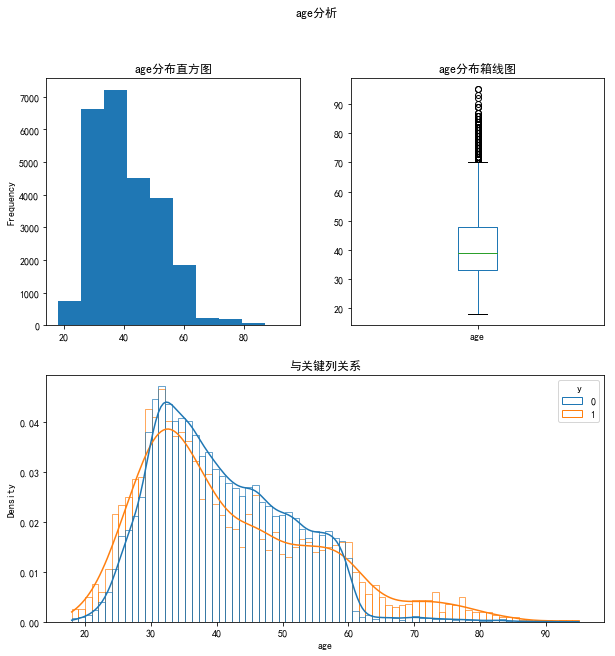

In [15]:
# 用age测试代码
numerical_eda('age')

- job

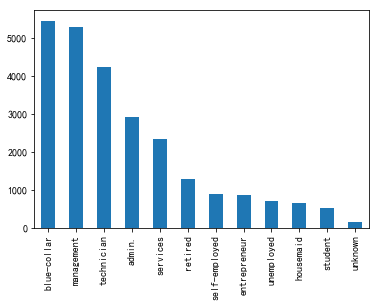

In [16]:
# 查看不同工作的数量
data['job'].value_counts().plot(kind='bar');

- blue-collar，management，technician数量较多；
- unknown，student，housemaid等数量较少；
- 考虑可以将部分类型进行归并等。

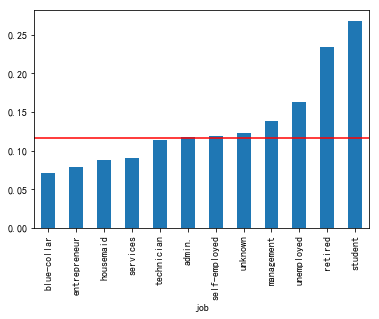

In [18]:
# 与关键列关系
# 聚合后均值
data.groupby('job')['y'].mean().sort_values().plot(kind='bar')
# 绘制全部数据的均值
plt.axhline(y=data['y'].mean(),color='red');

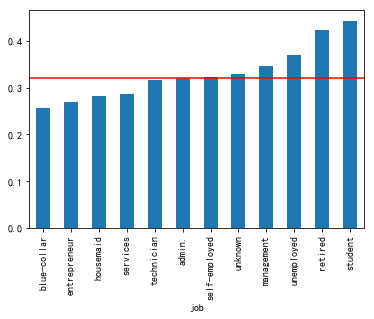

In [19]:
# 聚合后标准差
data.groupby('job')['y'].std().sort_values().plot(kind='bar')
# 绘制全部数据的标准差
plt.axhline(y=data['y'].std(),color='red');

我们可以按照各个类目的数值与总体数据数值的关系，分为三类，即低于总体均值、接近总体均值与大于总体均值。

In [20]:
# 将上面两图合并，并封装为函数
def categorical_eda(col_name):
    '''
    对类别型变量进行探索性分析，返回该变量中各类目的数量及其与关键列y之间的关系
    col_name: str, 待分析的列名
    '''
    # 设置图像大小
    plt.figure(figsize=(10, 5))
    # 添加子图1，各类目的数量
    ax1 = plt.subplot(121)
    data[col_name].value_counts().plot(
        kind='bar', title=f'{col_name}各类目数量', ax=ax1)
    # 添加子图2，与y关系
    ax2 = plt.subplot(122)
    # 计算按照col_name聚合后，y的均值及标准差
    mean_std = data.groupby(col_name)['y'].describe()[['mean', 'std']]
    # 获取顺序
    order = mean_std.sort_values(by='mean').index
    # 如果是月份列的话，则按照月份进行排序
    if col_name == 'month':
        order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                 'jul', 'aug', 'sep', 'oct', 'nov',  'dec']
    # 对数据进行reshape，便于可视化
    mean_std = mean_std.unstack().reset_index()
    # 重命名列
    mean_std = mean_std.rename(columns={'level_0': '统计项', 0: '值'})
    # 可视化
    sns.barplot(x=col_name, y='值', hue='统计项',
                order=order, data=mean_std, ax=ax2)
    # 绘制全部数据的均值
    plt.axhline(y=data['y'].mean(), color='#3274A1')
    # 绘制全部数据的标准差
    plt.axhline(y=data['y'].std(), color='#E1812C')
    # 旋转轴标签
    plt.xticks(rotation=90)
    ax2.set_title('与关键列关系')
    plt.suptitle(f'{col_name}分析')

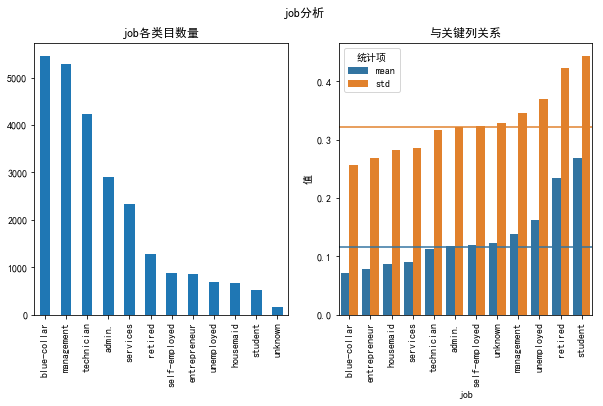

In [21]:
categorical_eda('job')

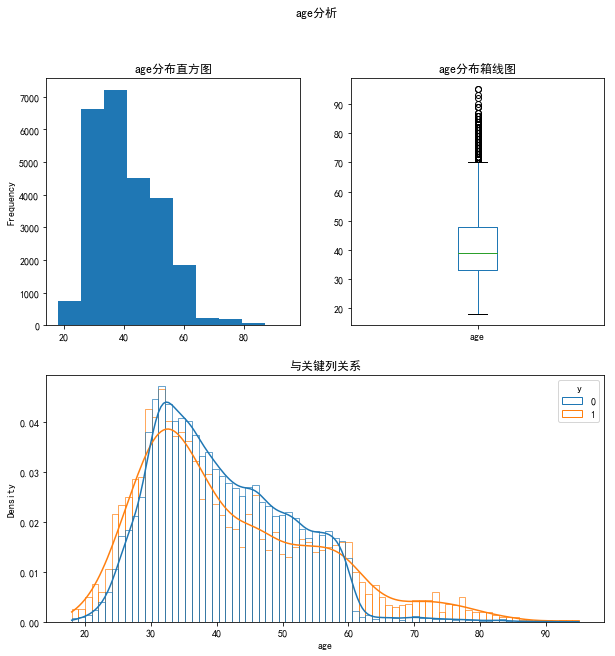

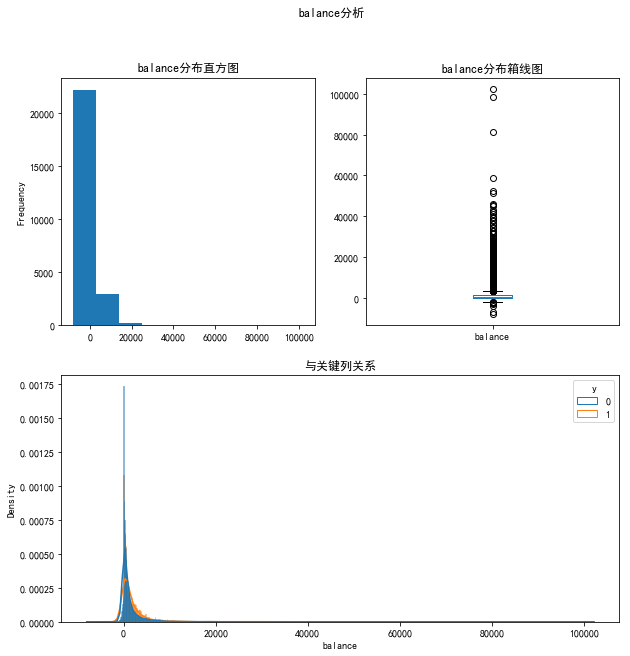

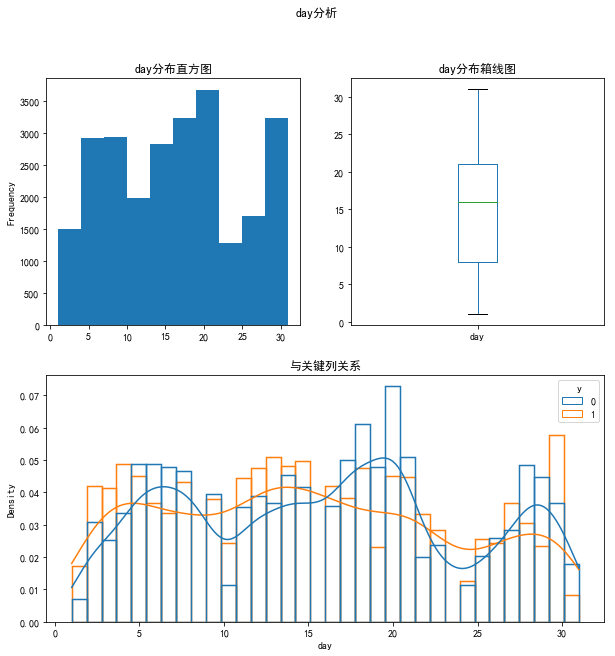

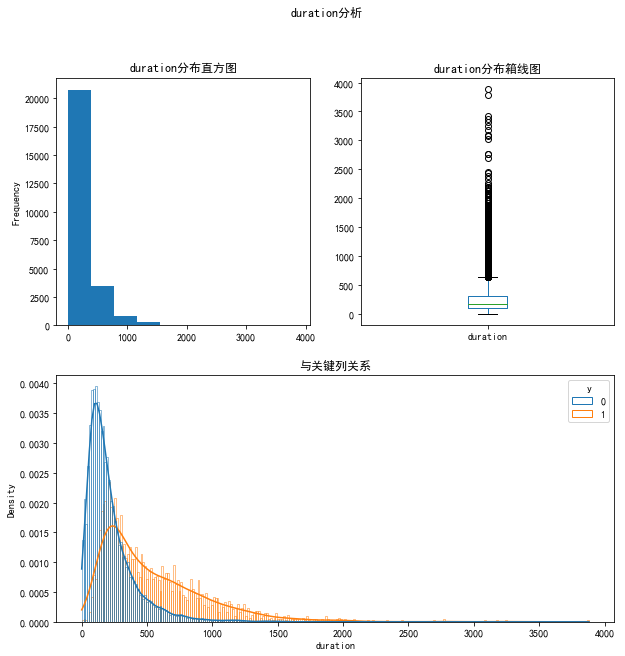

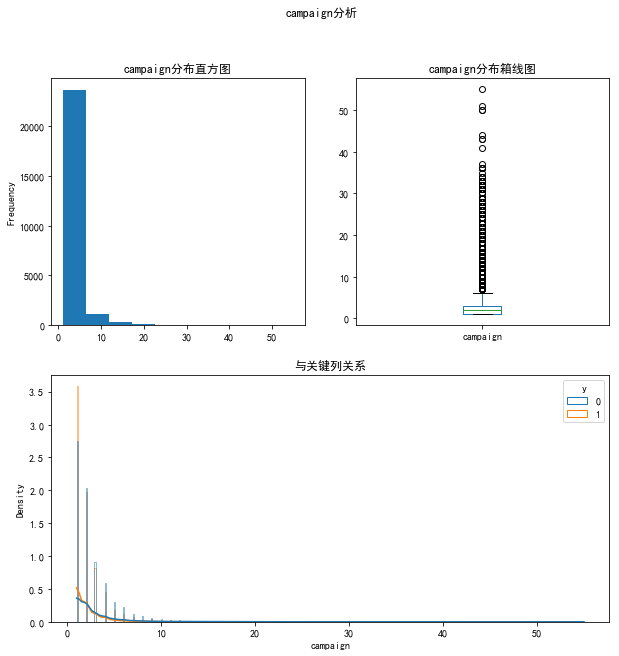

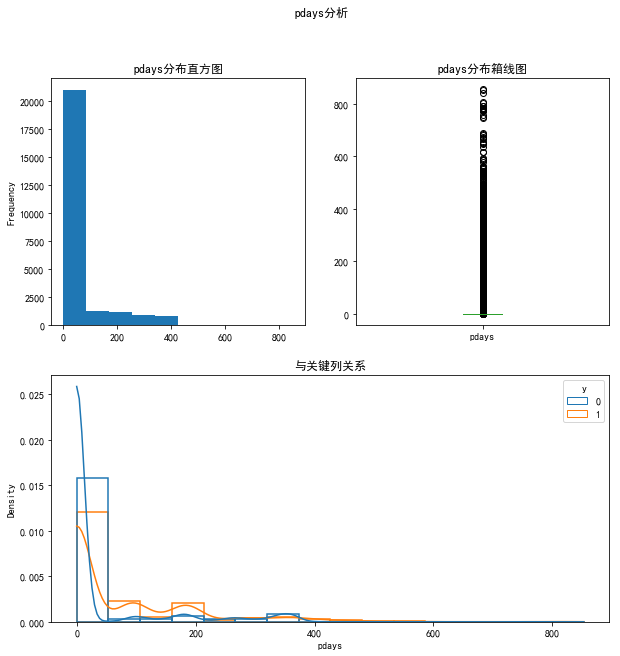

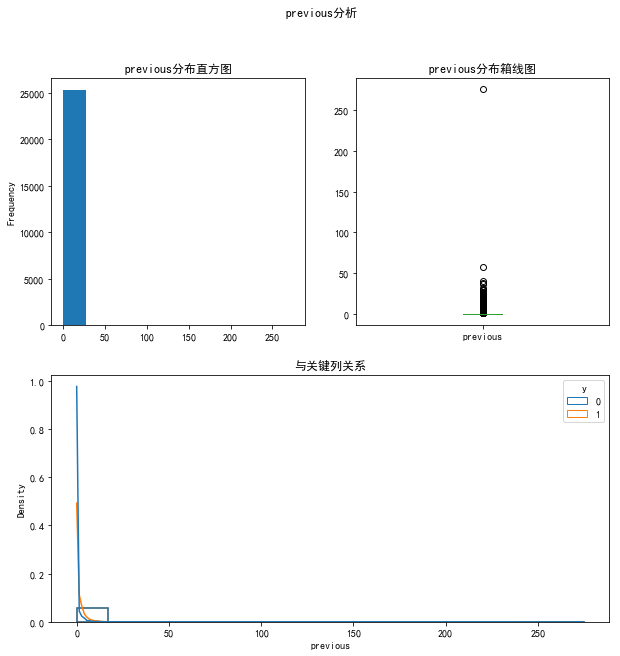

In [22]:
# 筛选出数值变量
num_cols = [col for col in data.columns if col not in list(cate_cols)+['y']]

# 使用for循环简化代码
for col in num_cols:
    numerical_eda(col)

总结：
- 部分列由于分布较为分散（如`balance`等），可视化的可读性不高，可以使用**对数轴**，重新进行可视化；
- 对于`duration`，即最后一次交流时长，我们发现订购定期存款业务的客户在大于250的范围内，有更高的比例；
- 部分列中的离群值较多，可以考虑截断处理。

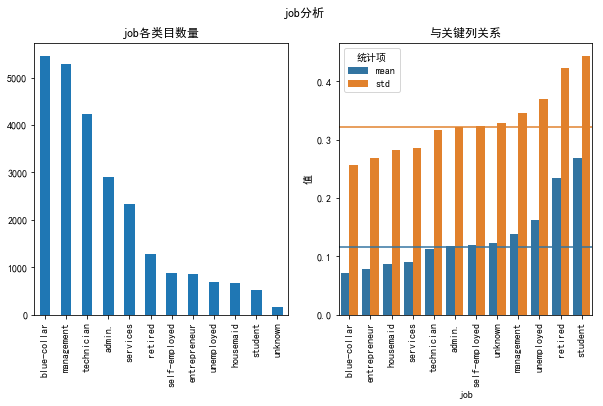

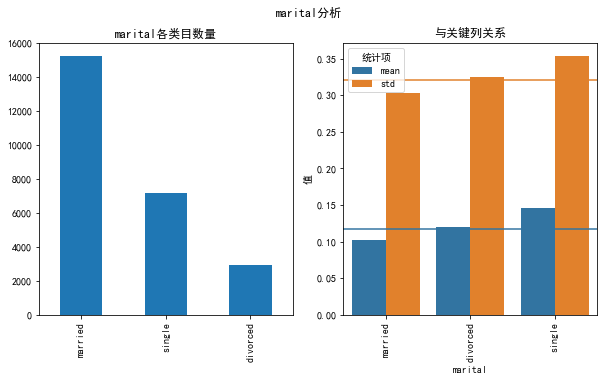

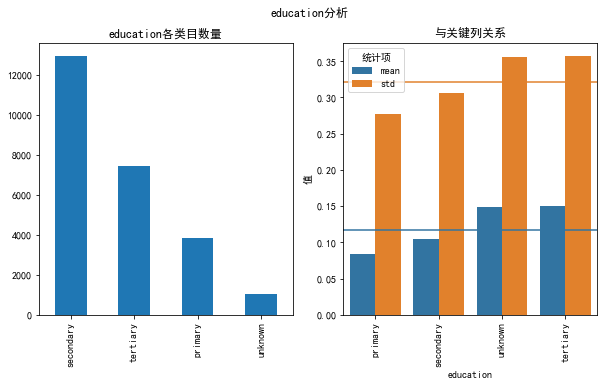

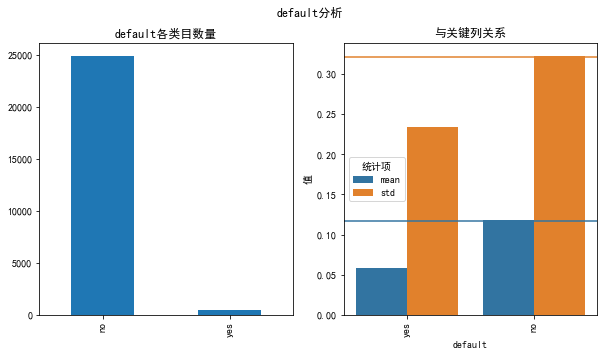

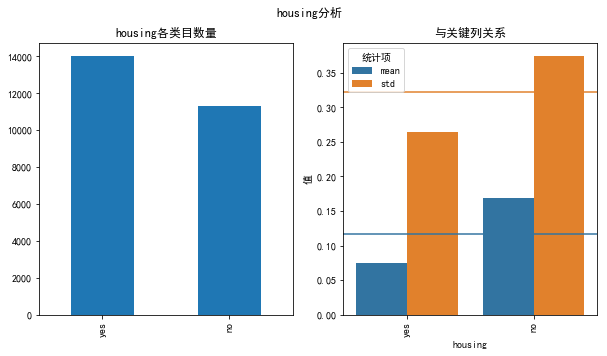

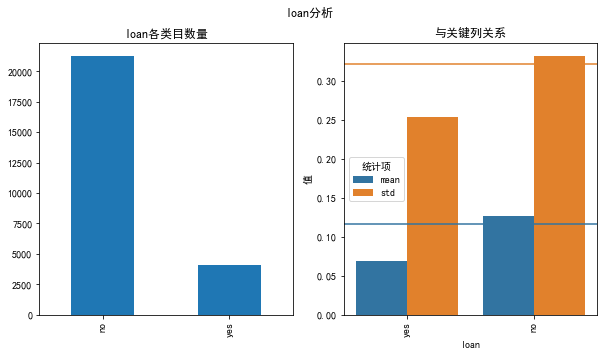

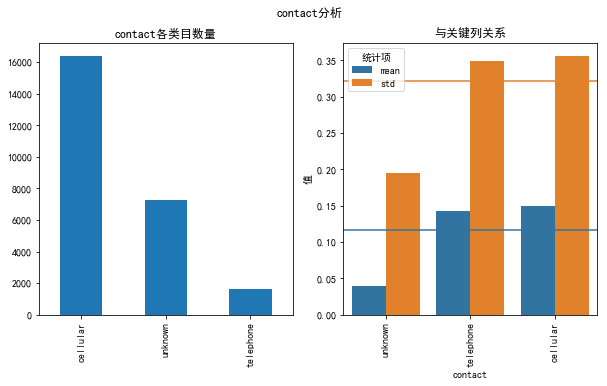

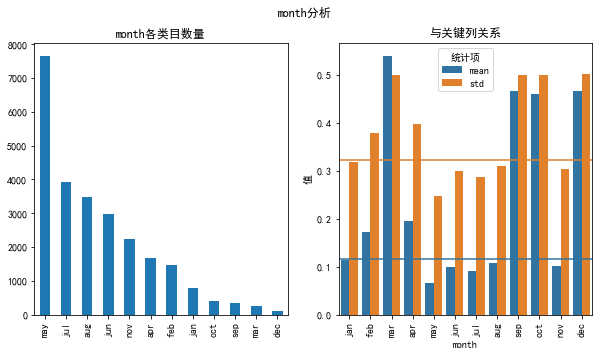

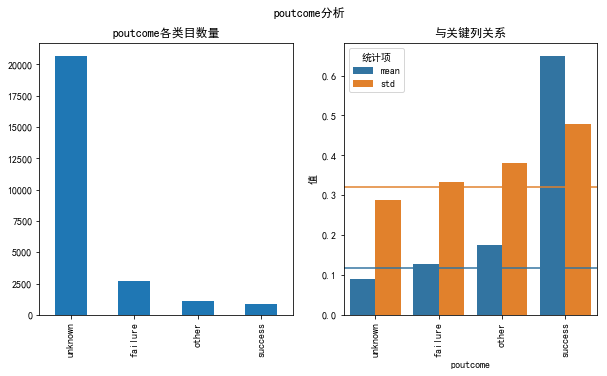

In [23]:
# 使用for循环简化代码
for col in cate_cols:
    categorical_eda(col)

总结：
- 对于`month`，五月份的占比最高，但均值最低；三、九、十、十二的占比最低，但均值最高；
- 对于`contact`，`telephone`与`cellular`对应的数据相似，但与`unknown`有很大区别；
- 对于`month`，`success`对应的均值最高，其余三项相当。

### 数据清洗

In [32]:
# 修改数据类型
data['day'] = data['day'].astype('O')

- 由于并未发现数据中存在其他数据类型错误、重复值、重复表达等情况存在，只是个别列存在较多的离群值，而离群值的处理方式较多，且对模型影响较大，所以我们可以将其放到特征工程部分去进行处理；
- 数据中存在的`unknown`应该当作缺失值，这部分同样在特征工程中再处理。

## 特征工程

In [61]:
# 备份数据
data_for_model = data.copy()

### 离群值的处理

In [42]:
# 离群值检测
def deal_outlier(col,method='clip'):
    '''
    处理某列中的离群值
    col: str, 待处理的列名
    method: str, 离群值处理方法。
            clip: 将离群值填充为计算后的最小或最大值；
            mean: 将离群值填充为均值；
            num: 将离群值填充为-1；
    '''
    # 计算第一与第三四分位数
    Q1 = data_for_model[col].quantile(0.25)
    Q3 = data_for_model[col].quantile(0.75)
    # 计算四分位差
    IQR = Q3 - Q1
    # 最小值
    Min = Q1 - 1.5 * IQR
    # 最大值
    Max = Q3 + 1.5 * IQR
    # 处理离群值
    if method == 'clip':
        col_data = data_for_model[col].clip(Min,Max)
    else:
        col_data = data_for_model[col]
        if method == 'mean':
            col_data[(col_data < Min)|(col_data > Max)] = col_data[(col_data >= Min)&(col_data <= Max)].mean()
        elif method == 'num':
            col_data[(col_data < Min)|(col_data > Max)] = -1
        else:
            raise MethodError("method只能是clip,mean及num中的其中一个。")
            
    # 对处理后的数据进行可视化
    col_data.plot(kind='hist',title='处理后的数据分布');
    return col_data

**解析：**
- 离群值的定义:
    - 首先结合业务及常识去判断，如3m的身高，200岁的年龄等等；
    - 大于第三分位数1.5倍四分位差的值 与 小于第一分位数1.5倍四分位差的值。

离群值的处理方式有很多，常见的有：
- 直接截断，并用计算后的最大、最小值填充离群值；
- 使用均值或中位数填充；
- 使用某一数字填充，如999,-1等，主要是为了对其进行标记；
- 直接删除离群值。


参考：[How Are Outliers Determined in Statistics?](https://www.thoughtco.com/what-is-an-outlier-3126227#:~:text=Determining%20Outliers%20Multiplying%20the%20interquartile%20range%20%28IQR%29%20by,are%20less%20than%20this%20number%20are%20considered%20outliers.)

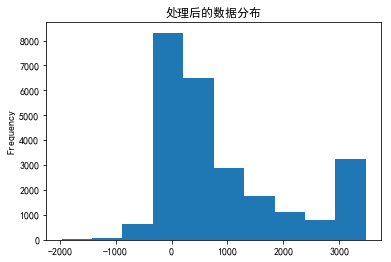

In [62]:
data_for_model['balance'] = deal_outlier('balance')

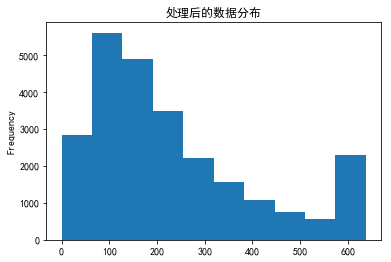

In [63]:
data_for_model['duration'] = deal_outlier('duration')

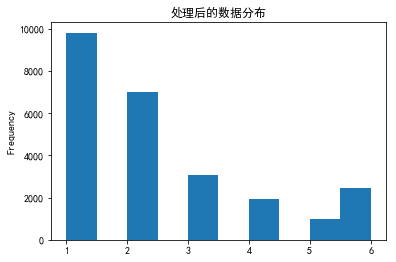

In [64]:
data_for_model['campaign'] = deal_outlier('campaign')

In [65]:
# 对pdays进行分箱处理
# 定义分箱边界
pdays_bins = [-2, 0, 30, 90, 180, 365, data_for_model['pdays'].max()+1]
# 分箱处理，并转换为数字
data_for_model['pdays'] = pd.cut(data_for_model['pdays'], bins=pdays_bins,
                                 labels=range(len(pdays_bins)-1)).astype(int)

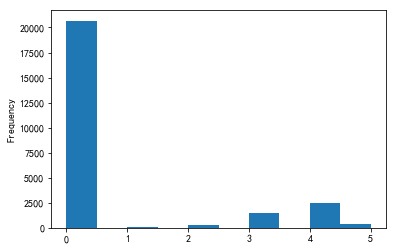

In [66]:
data_for_model['pdays'].plot(kind='hist');

In [67]:
# 对previous进行分箱处理
# 定义分箱边界
previous_bins = [-1, 0, 1, 2,data_for_model['previous'].max()+1]
# 分箱处理，并转换为数字
data_for_model['previous'] = pd.cut(data_for_model['previous'], bins=previous_bins,
                                 labels=range(len(previous_bins)-1)).astype(int)

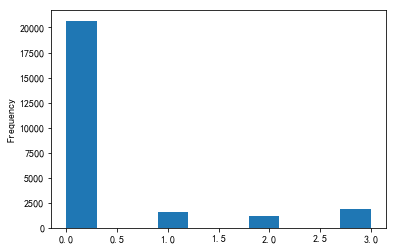

In [68]:
data_for_model['previous'].plot(kind='hist');

**解析：**

由于`pdays`与`previous`中存在大量相等的数据，如果按照之前的离群值处理方式，就会消除数据之间的差异性，所以，这里需要进行特殊处理，可以尝试如下两种方式：
- 不做任何处理
- 使用分箱的方式，对数据进行划分，如`pdays`可以划分为：-1、一个月内、三个月内、半年内、一年内、超过一年等。

### 分类变量处理

In [72]:
# 在建模前，需要将分类变量转换为数值变量
# 使用one-hot Encoding，并删除冗余变量
data_for_model = pd.get_dummies(data_for_model,drop_first=True)

In [73]:
# 查看数据类型
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25317 entries, 1 to 25317
Data columns (total 43 columns):
age                    25317 non-null int64
balance                25317 non-null int64
day                    25317 non-null int64
duration               25317 non-null int64
campaign               25317 non-null int64
pdays                  25317 non-null int32
previous               25317 non-null int32
y                      25317 non-null int64
job_blue-collar        25317 non-null uint8
job_entrepreneur       25317 non-null uint8
job_housemaid          25317 non-null uint8
job_management         25317 non-null uint8
job_retired            25317 non-null uint8
job_self-employed      25317 non-null uint8
job_services           25317 non-null uint8
job_student            25317 non-null uint8
job_technician         25317 non-null uint8
job_unemployed         25317 non-null uint8
job_unknown            25317 non-null uint8
marital_married        25317 non-null uint8
marital_sin

## 拟合模型

### 确定评价方法

想要知道模型的优劣，需要根据当前业务场景及数据特征，选择合适的评价方法。

请选择你认为适合本数据场景的评价方法：
- [ ] 准确率（Accuracy）
- [ ] 召回率（Recall）
- [ ] 精确率（Precision）
- [ ] F-Score
- [ ] 受试者操作曲线下与坐标轴围成的面积（AUC of ROC）


**解析：**

希望你选择的是**F-Score**或者**AUC of ROC**，因为本数据为不均衡数据（y中的类别占比不想等），所以准确率（Accuracy）并不适合评估此类数据场景，假如我不使用任何算法，把所有的预测结果都盲猜为0，也依然可以获得0.883的准确率，但这样是没有意义的。
  
  
召回率（Recall）与精确率（Precision）常用于特定的业务场景下，如：
- 试错成本较高，宁肯错判也不能漏判的医疗检测场景，一般使用召回率（Recall）作为评价方法；
- 试错成本较低，鼓励多多尝试的优惠券发放场景，可以使用精确率（Precision）等作为评价方法；
  
  
所以，针对本数据，我们可以使用：
- 综合考虑召回与精确的F-score，它还能适用于数据不均衡场景，会是一个不错的选择；
- F-score可以针对二值化的数据进行评分，但如果我们想要获取的最终结果是*客户下单的概率*呢？这时候使用AUC of ROC会更合适。

### 搭建模型训练-预测管道

In [24]:
# 从sklearn中导入拆分数据集函数
from sklearn.model_selection import train_test_split
# 拆分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(data_for_model.drop('y',axis=1), 
                                                data_for_model['y'], 
                                                test_size = 0.25,
                                                stratify = data_for_model['y'],                                                
                                                random_state = 42)

In [23]:
# 为了方便对比不同算法模型在此数据场景的表现，你需要搭建一个模型训练-预测函数（Pipeline），来简化重复工作
# 导入时间拓展
from time import time
# 从sklearn中导入评价方法
from sklearn.metrics import f1_score, roc_auc_score

def train_predict(learner, X_train, X_test, y_train, y_test): 
    '''
    输入:
       - learner: 用于模型拟合与预测的算法
       - X_train: 训练集特征
       - y_train: 训练集标签
       - X_test: 测试集特征
       - y_test: 测试集标签
    '''    
    # 初始化结果为字典，用于储存最后结果
    results = {}
    
    # 使用按照'sample_size'截取后的训练集，拟合模型
    start = time() 
    learner = learner.fit(X_train,y_train)
    end = time()
    
    # 计算训练时间
    results['train_time'] = end - start
        
    # 获取测试集与训练集的预测结果
    start = time()
    
    predictions_train = learner.predict(X_train)
    predict_prob_train = learner.predict_proba(X_train)[:,1]
    predictions_test = learner.predict(X_test)
    predict_prob_test = learner.predict_proba(X_test)[:,1]
    
    end = time() 
    
    # 计算预测时间
    results['pred_time'] = end - start
    
    # 计算训练集的评分
    results['f_train'] = f1_score(y_train,predictions_train)
    results['auc_train'] = roc_auc_score(y_train,predict_prob_train)
        
    # 计算测试集的评分
    results['f_test'] = f1_score(y_test,predictions_test)
    results['auc_test'] = roc_auc_score(y_test,predict_prob_test)
       
    # 提示训练结束
    print(f"{learner.__class__.__name__}模型训练结束。")
        
    # 返回结果
    return results

In [25]:
# 请从sklearn中导入至少三种监督学习算法
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 实例化导入的模型
clf_A = LogisticRegression(random_state=42)
clf_B = RandomForestClassifier(random_state=42)
clf_C = GradientBoostingClassifier(random_state=42)


# 对如上三种算法，分别进行拟合，并获取结果，将结果保存至results中
results = {}
# 循环三种算法
for clf in [clf_A, clf_B, clf_C]:
    # 获取函数名称
    clf_name = clf.__class__.__name__
    results[clf_name] = train_predict(clf, X_train, X_test, y_train, y_test)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression模型训练结束。
RandomForestClassifier模型训练结束。
GradientBoostingClassifier模型训练结束。


In [106]:
# 查看结果
pd.DataFrame(results)

,LogisticRegression,RandomForestClassifier,GradientBoostingClassifier
auc_test,0.879119,0.919574,0.918290
auc_train,0.880063,1.000000,0.935582
f_test,0.372973,0.450607,0.481702
f_train,0.381179,1.000000,0.541105
pred_time,0.025000,0.970000,0.101000
train_time,0.598000,2.379000,3.184000


发现：
- RandomForestClassifier出现了过拟合；
- GradientBoostingClassifier在训练集与测试集上的表现较为均衡，且都比另外两种类型的算法评分优秀；
- GradientBoostingClassifier训练时间稍长。

## 优化

当进行模型优化时，我们首先需要考虑进行更细致的特征工程，让数据表达出更多信息，这会对模型最终的评分提升较大；其次，考虑使用较优秀的新算法；最后，再使用网格搜索（GridSearch）等方法去进行参数调优。

- 请完成至少三个方面的特征优化；
- 请使用至少一种新算法（Xgboost，LightGBM等）；
- 请完成至少一个参数的调优。

In [33]:
# 备份数据
data_opti = data.copy()

### 统计每条样本中的缺失数量

In [34]:
# 样本中的缺失数量，可以说明我们对客户的掌握程度
# 将unknown替换为np.NaN
data_opti = data_opti.replace('unknown',np.NaN)
# 统计缺失值数量
data_opti['nan_nums'] = data_opti.isna().sum(axis=1)

### 分类数据重编码

In [35]:
# 依据前面EDA中得到的信息，对分类变量进行重编码
# job
def encode_job(x):
    if x in ['blue-collar','entrepreneur','housemaid','services']:
        return 'A'
    elif x in ['technician','admin.','self-employed',np.NaN]:
        return 'B'
    else:
        return 'C'
    
data_opti['job'] = data_opti['job'].apply(encode_job)

In [36]:
# education
# education为有序分类，根据前面eda信息，可以将unknown作为tertiary处理
data_opti['education'] = data_opti['education'].map({'primary':0,'secondary':1,'tertiary':2})
data_opti['education'] = data_opti['education'].fillna(2)

In [37]:
# contact
# 'cellular', 'telephone'改为一类，nan改为另一类
data_opti.loc[data_opti['contact'].notna(),'contact'] = 'A'
data_opti['contact'] = data_opti['contact'].fillna('B')

In [38]:
# month
# 依据eda结果进行重编码
def encode_month(x):
    if x in ['oct', 'dec','sep', 'mar']:
        return 'A'
    elif x in ['feb', 'apr', ]:
        return 'B'
    else:
        return 'C'
    
data_opti['month'] = data_opti['month'].apply(encode_month)

In [39]:
# poutcome
# 根据eda，只需分为success与other两类即可
data_opti.loc[data_opti['poutcome'] != 'success','poutcome'] = 'other'

### 数值数据分箱

In [40]:
# age
# 依据eda，可以分为30以下，30-40,40-50,50-60,60以上
age_bins = [0,30,40,50,60,100]
data_opti['age_group'] = pd.cut(data_opti['age'],age_bins,labels=range(len(age_bins)-1))

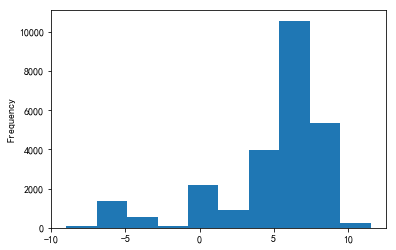

In [41]:
# balance
# balance的跨度非常大，我们可以先使用对数进行平滑处理
data_opti['balance_log'] = data_opti['balance'].apply(lambda x:np.log(abs(x)+1))
# 添加负号
minus_balance = data_opti[data_opti['balance'] < 0].index
# 添加负号
data_opti.loc[minus_balance,'balance_log'] = 0 - data_opti.loc[minus_balance,'balance_log']
# 查看分布
data_opti['balance_log'].plot(kind='hist');

In [42]:
# duration
data_opti['duration_log'] = data_opti['duration'].apply(lambda x:np.log(x+1))

In [43]:
# campaign
# 分箱为1,2,3及以上
data_opti.loc[data_opti['campaign'] >= 3,'campaign'] = 3

In [44]:
# 对pdays进行分箱处理（这里的处理方式没变）
# 定义分箱边界
pdays_bins = [-2, 0, 30, 90, 180, 365, data_opti['pdays'].max()+1]
# 分箱处理，并转换为数字
data_opti['pdays'] = pd.cut(data_opti['pdays'], bins=pdays_bins,
                                 labels=range(len(pdays_bins)-1)).astype(int)

In [45]:
# 对previous进行分箱处理（这里的处理方式没变）
# 定义分箱边界
previous_bins = [-1, 0, 1, 2,data_opti['previous'].max()+1]
# 分箱处理，并转换为数字
data_opti['previous'] = pd.cut(data_opti['previous'], bins=previous_bins,
                                 labels=range(len(previous_bins)-1)).astype(int)

In [46]:
# 将数据中的分类变量转为数值变量
data_opti = pd.get_dummies(data_opti,drop_first=True)

### 数据不平衡问题

参考：[机器学习中不平衡数据的预处理](https://www.capallen.top/2019/Deal-with-imbalanced-data-in-ML.html)

In [47]:
# 将数据划分为训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(data_opti.drop('y',axis=1), 
                                                data_opti['y'], 
                                                test_size = 0.25,
                                                stratify = data_opti['y'],                                                
                                                random_state = 42)

In [48]:
# 从imblearn包中导入SMOTE函数
from imblearn.over_sampling import SMOTE

# 计算合成前的均值
print('合成前：',y_train.mean())

# 实例化SMOTE方法
sm = SMOTE(random_state=42)
# 合成
X_res, y_res = sm.fit_resample(X_train, y_train)
# 计算合成后的均值
print('合成后：',y_res.mean())

合成前： 0.1169747722125665
合成后： 0.5


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 使用LightGBM

In [49]:
# 导入lightgbm
import lightgbm as lgb
# 实例化lgb
lgbm = lgb.LGBMClassifier(random_state=42)

### 重新拟合模型

In [50]:
# 实例化导入的模型
clf_A = LogisticRegression(random_state=42)
clf_B = RandomForestClassifier(random_state=42)
clf_C = GradientBoostingClassifier(random_state=42)


# 对如上四种算法，分别进行拟合，并获取结果，将结果保存至results中
results = {}
# 循环三种算法
for clf in [clf_A, clf_B, clf_C, lgbm]:
    # 获取函数名称
    clf_name = clf.__class__.__name__
    results[clf_name] = train_predict(clf, X_res, X_test, y_res, y_test)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression模型训练结束。
RandomForestClassifier模型训练结束。
GradientBoostingClassifier模型训练结束。
LGBMClassifier模型训练结束。


In [196]:
# 查看结果
pd.DataFrame(results)

,LogisticRegression,RandomForestClassifier,GradientBoostingClassifier,LGBMClassifier
auc_test,0.881167,0.915480,0.911428,0.919952
auc_train,0.893918,1.000000,0.989795,0.995118
f_test,0.507645,0.525926,0.534596,0.531607
f_train,0.809125,0.999970,0.947527,0.962838
pred_time,0.007000,1.169000,0.206000,0.213000
train_time,0.425000,5.308000,12.570000,0.618000


发现：LGBMClassifier评分更高，且花费时间更少，故选择LGBMClassifier进行参数调优

### 使用GridSearch进行参数优化

In [217]:
# 导入GridSearchCV与make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# from sklearn.ensemble import RandomForestClassifier
# 实例化模型
clf = lgb.LGBMClassifier(random_state=42)

# 创建需要调优的参数字典
parameters = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15, 20, 25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9]
}

# 使用make_scorer创建评分标准
scorer = make_scorer(roc_auc_score)

start = time()
# 实例化GridSearchCV
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# 拟合数据
grid_fit = grid_obj.fit(X_res, y_res)

# 获取最佳模型
best_clf = grid_fit.best_estimator_

# 使用最佳模型进行预测
best_predictions = best_clf.predict(X_test)
best_predict_proba = best_clf.predict_proba(X_test)[:, 1]
end = time()
gs_time = end - start

predictions = (clf.fit(X_train, y_train)).predict(X_test)
predict_proba = (clf.fit(X_train, y_train)).predict_proba(X_test)[:, 1]
# 展示最终结果
print("未优化模型\n------")
print("测试集F1-Score: {:.4f}".format(f1_score(y_test, predictions)))
print("测试集AUC: {:.4f}".format(roc_auc_score(y_test, predict_proba)))
print("\n优化后模型\n------")
print("测试集F1-Score: {:.4f}".format(f1_score(y_test, best_predictions)))
print("测试集AUC: {:.4f}".format(roc_auc_score(y_test, best_predict_proba)))
print("优化共耗时: {}s".format(gs_time))

未优化模型
------
测试集F1-Score: 0.5398
测试集AUC: 0.9184

优化后模型
------
测试集F1-Score: 0.5372
测试集AUC: 0.9221
优化共耗时: 83.77100014686584s


## 业务解读

### 查看特征重要性

In [55]:
# 查看特征重要性
feature_importances = pd.DataFrame({'特征': X_train.columns,
                                    '重要性': best_clf.feature_importances_})

In [56]:
feature_importances.sort_values(by='重要性',ascending=False)

,特征,重要性
4,duration,459
3,day,324
2,balance,265
0,age,202
20,month_C,163
9,balance_log,142
5,campaign,131
8,nan_nums,128
16,housing_yes,123
6,pdays,115


结论： 就此模型而言，`duration`即最后一次联系的交流时长、`age`年龄等对最终客户是否会采用

### 使用Shap解释模型

使用LightGBM、RandomForest等算法，虽然可以提升算法性能，但是同样由于模型的复杂度高，可解释性不如逻辑回归与决策树等。这时候，就需要使用黑盒模型事后归因解析：SHAP方法。

关于SHAP你可以通过如下三个阅读材料去了解，并尝试对你的模型进行解释。
- [黑盒模型事后归因解析：SHAP方法](https://cloud.tencent.com/developer/news/624937)
- [利用SHAP解释Xgboost模型](http://sofasofa.io/tutorials/shap_xgboost/)
- [Shap Documents](https://shap.readthedocs.io/en/latest/)

In [58]:
# 导入shap
import shap
# 计算shap value
shap_values = shap.TreeExplainer(lgbm).shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


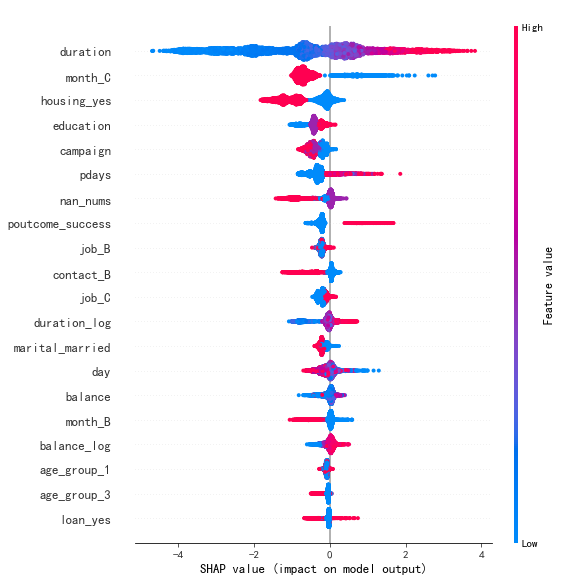

In [69]:
# 查看shap_values[1]（即购买）的summary
shap.summary_plot(shap_values[1], X_test)

从上图中可以发现几个典型特征：
- `duration`对模型结果的影响最大，而且`duration`越大，客户就越有可能会订购该业务；
- `nan_nums`即用户缺失的数据量，缺失数量较多的客户，订购该业务的可能性会降低；
- `poutcome`即上一次活动的结果，成功的客户订购该业务的可能性会更高。

通过对如上结果的分析，我们可以适时地调整电话销售策略，优先筛选出“订购可能性较高”的客户。或者，我们也可以先进行A/B测试，检查模型在实际生产环境中的可靠性，之后再进行优化与调整。